In [29]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn
import json
import urllib.request
import pandas as pd

In [30]:
%matplotlib inline

In [31]:
urllib.request.urlretrieve('https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&aggregate=1&allData=true','BTC_USD_HIST_DAYWISE.json')
urllib.request.urlretrieve('https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&aggregate=1&allData=true','ETH_USD_HIST_DAYWISE.json')

('ETH_USD_HIST_DAYWISE.json', <http.client.HTTPMessage at 0x24713359208>)

In [32]:
eth_DF = pd.io.json.json_normalize(json.load(open('ETH_USD_HIST_DAYWISE.json','r')),record_path='Data')
btc_DF = pd.io.json.json_normalize(json.load(open('BTC_USD_HIST_DAYWISE.json','r')),record_path='Data')

In [33]:
eth_DF.head()

,close,high,low,open,time,volumefrom,volumeto
0,3.00,3.0,0.6747,0.6747,1438905600,123.93,371.79
1,1.20,3.0,0.1500,3.0000,1438992000,2119.43,1438.16
2,1.20,1.2,1.2000,1.2000,1439078400,0.00,0.00
3,1.20,1.2,1.2000,1.2000,1439164800,0.00,0.00
4,0.99,1.2,0.6504,1.2000,1439251200,9486.09,7419.73


In [34]:
btc_DF.head()

,close,high,low,open,time,volumefrom,volumeto
0,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902
1,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900
2,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600
3,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900
4,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600


In [35]:
btc_DF['time'] = pd.to_datetime(btc_DF['time'],unit='s')
eth_DF['time'] = pd.to_datetime(eth_DF['time'],unit='s')

In [36]:
btc_DF.groupby(['time'])

In [37]:
btc_DF.head().mean()

close           0.07402
high            0.07789
low             0.06535
open            0.06808
volumefrom    301.20200
volumeto       23.71804
dtype: float64

In [38]:
eth_DF.tail()    

,close,high,low,open,time,volumefrom,volumeto
959,543.83,543.84,506.79,539.89,2018-03-23,432407.55,2.252001e+08
960,520.16,546.01,519.51,543.84,2018-03-24,241529.67,1.293504e+08
961,523.01,535.77,513.63,520.17,2018-03-25,213514.32,1.114623e+08
962,486.25,526.20,467.48,522.97,2018-03-26,567723.19,2.786568e+08
963,457.31,491.92,447.79,486.14,2018-03-27,469478.65,2.163903e+08


In [39]:
btc_DF.tail()

,close,high,low,open,time,volumefrom,volumeto
2806,8934.80,8935.88,8307.58,8724.98,2018-03-23,109649.39,9.399973e+08
2807,8548.06,9036.23,8515.53,8935.51,2018-03-24,93296.24,8.276632e+08
2808,8472.84,8690.36,8395.85,8548.39,2018-03-25,76775.64,6.576435e+08
2809,8152.20,8521.04,7869.27,8472.56,2018-03-26,131859.97,1.079039e+09
2810,8008.58,8226.24,7752.30,8152.18,2018-03-27,67987.28,5.417946e+08


In [40]:
btc_indexed=btc_DF.set_index('time').sort_index()

In [41]:
is_timeFrameBTC = ((btc_DF.time >= '2017-02-01') & (btc_DF.time <= '2018-03-26'))
is_timeFrameETH = ((eth_DF.time >= '2017-02-01') & (eth_DF.time <= '2018-03-26'))

currencies = ['BitCoin', 'Ethereum']

Text(0,0.5,'Low Value')

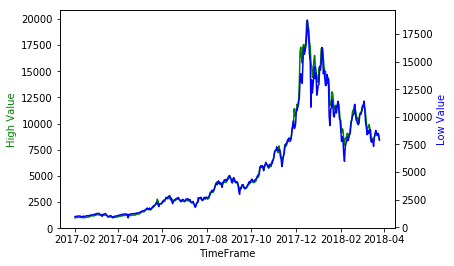

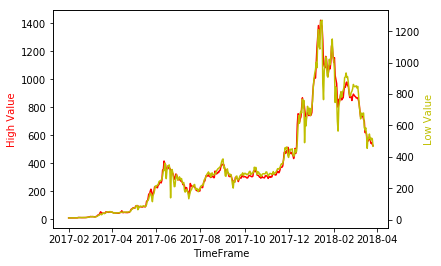

In [42]:
x = btc_DF[is_timeFrameBTC]['time']
y1 = btc_DF[is_timeFrameBTC]['high']
y2 = btc_DF[is_timeFrameBTC]['low']
y3 = eth_DF[is_timeFrameETH]['high']
y4 = eth_DF[is_timeFrameETH]['low']
fig, ax1 = pp.subplots()
ax2 = ax1.twinx()
fig, ax3 = pp.subplots()
ax4 = ax3.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax3.plot(x, y3, 'r-')
ax4.plot(x, y4, 'y-')
ax1.set_xlabel('TimeFrame')
ax1.set_ylabel('High Value', color='g')
ax2.set_ylabel('Low Value', color='b')
ax3.set_xlabel('TimeFrame')
ax3.set_ylabel('High Value', color='r')
ax4.set_ylabel('Low Value', color='y')

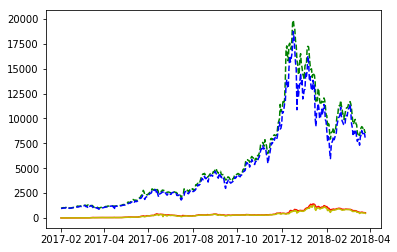

In [43]:
x = btc_DF[is_timeFrameBTC]['time']
y1 = btc_DF[is_timeFrameBTC]['high']
y2 = btc_DF[is_timeFrameBTC]['low']
y3 = eth_DF[is_timeFrameETH]['high']
y4 = eth_DF[is_timeFrameETH]['low']
pp.plot(x,y1,'g--',x,y2,'b--',x,y3,'r',x,y4,'y')

In [44]:
btc_DF['name']='BitCoin'

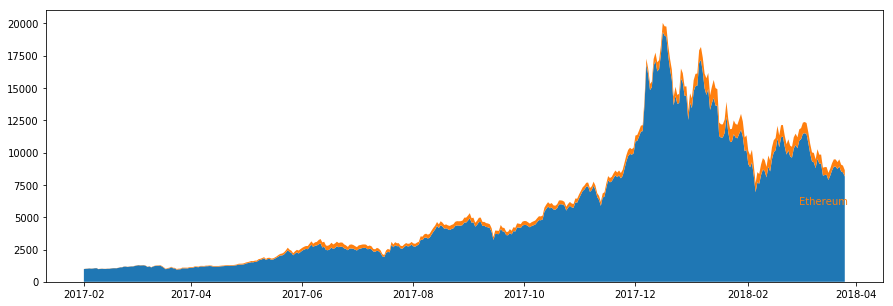

In [45]:
palette = seaborn.color_palette()
pp.figure(figsize=(15,5))
pp.stackplot(btc_DF[is_timeFrameBTC]['time'].tolist(),
             btc_DF[is_timeFrameBTC]['close'].tolist(),
             eth_DF[is_timeFrameETH]['close'].tolist())

for i,name in enumerate(currencies):
    pp.text('2018-03',5000 + 1000*i, name, color=palette[i])


In [46]:
eth_DF['name']='Ethereum'

In [47]:
eth_DF

,close,high,low,open,time,volumefrom,volumeto,name
0,3.00,3.00,0.6747,0.6747,2015-08-07,123.93,3.717900e+02,Ethereum
1,1.20,3.00,0.1500,3.0000,2015-08-08,2119.43,1.438160e+03,Ethereum
2,1.20,1.20,1.2000,1.2000,2015-08-09,0.00,0.000000e+00,Ethereum
3,1.20,1.20,1.2000,1.2000,2015-08-10,0.00,0.000000e+00,Ethereum
4,0.99,1.20,0.6504,1.2000,2015-08-11,9486.09,7.419730e+03,Ethereum
5,1.29,1.29,0.9050,0.9900,2015-08-12,2140.46,2.376280e+03,Ethereum
6,1.88,1.88,1.2600,1.2900,2015-08-13,3163.29,4.923220e+03,Ethereum
7,1.79,2.10,1.7900,1.8800,2015-08-14,5800.73,1.107041e+04,Ethereum
8,1.79,1.79,1.5000,1.7900,2015-08-15,8711.24,1.481275e+04,Ethereum
9,1.37,1.79,0.5000,1.7900,2015-08-16,9714.19,1.079495e+04,Ethereum


In [48]:
pd.merge(btc_DF, eth_DF, on='time', how='outer')

,close_x,high_x,low_x,open_x,time,volumefrom_x,volumeto_x,name_x,close_y,high_y,low_y,open_y,volumefrom_y,volumeto_y,name_y
0,0.04951,0.04951,0.04951,0.04951,2010-07-17,20.00,9.902000e-01,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.08584,0.08585,0.05941,0.04951,2010-07-18,75.01,5.090000e+00,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.08080,0.09307,0.07723,0.08584,2010-07-19,574.00,4.966000e+01,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.07474,0.08181,0.07426,0.08080,2010-07-20,262.00,2.059000e+01,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.07921,0.07921,0.06634,0.07474,2010-07-21,575.00,4.226000e+01,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.05050,0.08181,0.05050,0.07921,2010-07-22,2160.00,1.297800e+02,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.06262,0.06767,0.05050,0.05050,2010-07-23,2402.50,1.410700e+02,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.05454,0.06161,0.05049,0.06262,2010-07-24,496.32,2.673000e+01,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.05050,0.05941,0.05050,0.05454,2010-07-25,1551.48,8.506000e+01,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.05600,0.05600,0.05000,0.05050,2010-07-26,877.00,4.691000e+01,BitCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
pd.concat([btc_DF,eth_DF])

,close,high,low,open,time,volumefrom,volumeto,name
0,0.04951,0.04951,0.04951,0.04951,2010-07-17,20.00,9.902000e-01,BitCoin
1,0.08584,0.08585,0.05941,0.04951,2010-07-18,75.01,5.090000e+00,BitCoin
2,0.08080,0.09307,0.07723,0.08584,2010-07-19,574.00,4.966000e+01,BitCoin
3,0.07474,0.08181,0.07426,0.08080,2010-07-20,262.00,2.059000e+01,BitCoin
4,0.07921,0.07921,0.06634,0.07474,2010-07-21,575.00,4.226000e+01,BitCoin
5,0.05050,0.08181,0.05050,0.07921,2010-07-22,2160.00,1.297800e+02,BitCoin
6,0.06262,0.06767,0.05050,0.05050,2010-07-23,2402.50,1.410700e+02,BitCoin
7,0.05454,0.06161,0.05049,0.06262,2010-07-24,496.32,2.673000e+01,BitCoin
8,0.05050,0.05941,0.05050,0.05454,2010-07-25,1551.48,8.506000e+01,BitCoin
9,0.05600,0.05600,0.05000,0.05050,2010-07-26,877.00,4.691000e+01,BitCoin


In [50]:
pd.concat([btc_DF,eth_DF]).tail()

,close,high,low,open,time,volumefrom,volumeto,name
959,543.83,543.84,506.79,539.89,2018-03-23,432407.55,2.252001e+08,Ethereum
960,520.16,546.01,519.51,543.84,2018-03-24,241529.67,1.293504e+08,Ethereum
961,523.01,535.77,513.63,520.17,2018-03-25,213514.32,1.114623e+08,Ethereum
962,486.25,526.20,467.48,522.97,2018-03-26,567723.19,2.786568e+08,Ethereum
963,457.31,491.92,447.79,486.14,2018-03-27,469478.65,2.163903e+08,Ethereum


In [51]:
Concatenated_Data =pd.concat([btc_DF,eth_DF])

In [52]:
Concatenated_Data.groupby(['name'])

In [53]:
len(btc_DF.index)

2811

In [54]:
len(eth_DF.index)

964

In [55]:
Concatenated_Data_indexed=Concatenated_Data.set_index('name')

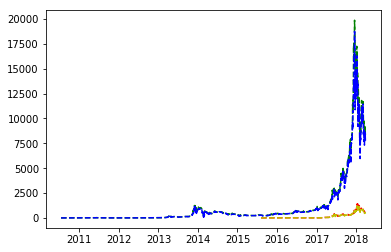

In [57]:
x1 = Concatenated_Data_indexed.loc['BitCoin']['time']
y1 = Concatenated_Data_indexed.loc['BitCoin']['high']
y2 = Concatenated_Data_indexed.loc['BitCoin']['low']
x2 = Concatenated_Data_indexed.loc['Ethereum']['time']
y3 = Concatenated_Data_indexed.loc['Ethereum']['high']
y4 = Concatenated_Data_indexed.loc['Ethereum']['low']
pp.plot(x1,y1,'g--',x1,y2,'b--',x2,y3,'r--',x2,y4,'y--')

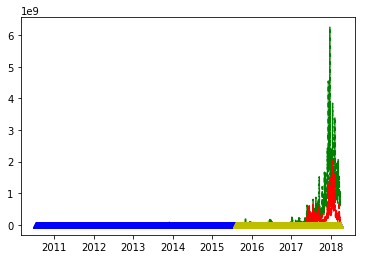

In [58]:
x1 = Concatenated_Data_indexed.loc['BitCoin']['time']
y1 = Concatenated_Data_indexed.loc['BitCoin']['volumeto']
y2 = Concatenated_Data_indexed.loc['BitCoin']['volumefrom']
x2 = Concatenated_Data_indexed.loc['Ethereum']['time']
y3 = Concatenated_Data_indexed.loc['Ethereum']['volumeto']
y4 = Concatenated_Data_indexed.loc['Ethereum']['volumefrom']
pp.plot(x1,y1,'g--',x1,y2,'b^',x2,y3,'r--',x2,y4,'y^')